In [92]:
# ---------------------------------
# Import Dependancies
# ---------------------------------
import numpy as np
import pandas as pd

%matplotlib inline
from matplotlib import style
# style.use('fivethirtyeight')
# plt.style.use('ggplot')
plt.style.use('classic')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func


In [3]:
# ---------------------------------
# Set Up Flask
# ---------------------------------

engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [4]:
# Create our session (link) from Python to the DB
# This session allows to query for data.  
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [5]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
results_june_temp=[]
results_june_temps = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 6).all()


In [18]:
#  3. Convert the June temperatures to a list.
# ****see above: --> results_june_temp[]
print(results_june_temps)


, ('2017-06-09', 80.0), ('2017-06-13', 81.0), ('2017-06-14', 78.0), ('2017-06-15', 77.0), ('2017-06-16', 78.0), ('2017-06-19', 78.0), ('2017-06-20', 77.0), ('2017-06-21', 76.0), ('2017-06-22', 81.0), ('2017-06-23', 76.0), ('2017-06-26', 82.0), ('2017-06-27', 80.0), ('2017-06-28', 80.0), ('2017-06-29', 79.0), ('2017-06-30', 74.0), ('2010-06-01', 69.0), ('2010-06-02', 70.0), ('2010-06-03', 67.0), ('2010-06-04', 70.0), ('2010-06-05', 73.0), ('2010-06-06', 73.0), ('2010-06-09', 72.0), ('2010-06-10', 72.0), ('2010-06-11', 77.0), ('2010-06-12', 70.0), ('2010-06-13', 78.0), ('2010-06-15', 73.0), ('2010-06-17', 75.0), ('2010-06-18', 70.0), ('2010-06-19', 74.0), ('2010-06-20', 77.0), ('2010-06-22', 69.0), ('2010-06-23', 73.0), ('2010-06-24', 73.0), ('2010-06-25', 74.0), ('2010-06-28', 73.0), ('2010-06-29', 72.0), ('2010-06-30', 75.0), ('2011-06-08', 73.0), ('2011-06-09', 76.0), ('2011-06-12', 74.0), ('2011-06-13', 76.0), ('2011-06-14', 73.0), ('2011-06-15', 76.0), ('2011-06-16', 76.0), ('2011-0

In [6]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 

df = pd.DataFrame(results_june_temps, columns=['date','Temperature'])
df.head()


,date,Temperature
0,2010-06-01,78.0
1,2010-06-02,76.0
2,2010-06-03,78.0
3,2010-06-04,76.0
4,2010-06-05,77.0


In [7]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
df.describe()

,Temperature
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [8]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.

results_december_temp=[]
results_december_temps = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 12).all()


In [23]:
# 7. Convert the December temperatures to a list.

# ****see above: --> results_june_temp[]
print(results_december_temps)


, ('2010-12-08', 67.0), ('2010-12-09', 76.0), ('2010-12-10', 68.0), ('2010-12-13', 69.0), ('2010-12-14', 71.0), ('2010-12-15', 70.0), ('2010-12-16', 68.0), ('2010-12-17', 66.0), ('2011-12-01', 69.0), ('2011-12-02', 69.0), ('2011-12-05', 71.0), ('2011-12-06', 72.0), ('2011-12-07', 69.0), ('2011-12-08', 72.0), ('2011-12-09', 70.0), ('2011-12-12', 76.0), ('2011-12-13', 69.0), ('2011-12-14', 71.0), ('2011-12-15', 72.0), ('2011-12-16', 71.0), ('2012-12-03', 78.0), ('2012-12-04', 73.0), ('2012-12-05', 74.0), ('2012-12-06', 68.0), ('2012-12-07', 71.0), ('2012-12-10', 76.0), ('2012-12-11', 75.0), ('2012-12-12', 74.0), ('2012-12-13', 73.0), ('2012-12-14', 73.0), ('2012-12-27', 74.0), ('2012-12-28', 69.0), ('2013-12-02', 74.0), ('2013-12-03', 72.0), ('2013-12-04', 70.0), ('2013-12-05', 67.0), ('2013-12-06', 69.0), ('2013-12-09', 73.0), ('2013-12-10', 75.0), ('2013-12-11', 74.0), ('2013-12-12', 72.0), ('2013-12-13', 71.0), ('2013-12-16', 67.0), ('2013-12-17', 74.0), ('2013-12-18', 70.0), ('2013-1

In [9]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 

df = pd.DataFrame(results_december_temps, columns=['date','Temperature'])
df.tail()


,date,Temperature
1512,2016-12-27,71.0
1513,2016-12-28,71.0
1514,2016-12-29,69.0
1515,2016-12-30,65.0
1516,2016-12-31,65.0


In [10]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
df.describe()


,Temperature
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


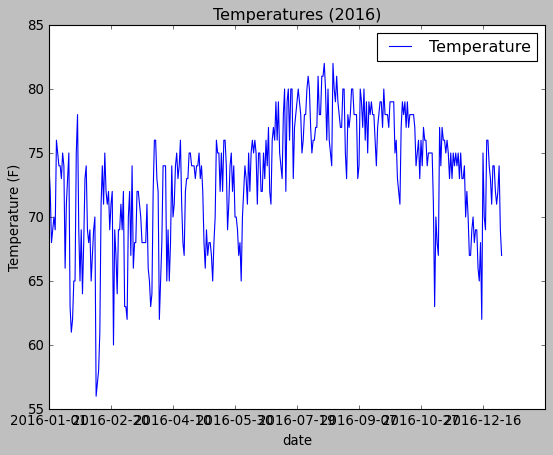

In [95]:
# Additional Querries

# 1. 2016 Temperatures

results_2016_daily_temp=[]

results_2016_daily_temp = session.query(Measurement.date, Measurement.tobs).filter(extract('year', Measurement.date) == 2016).filter(Measurement.station == 'USC00519281').all()


df = pd.DataFrame(results_2016_daily_temp, columns=['date','Temperature'])
df.set_index(df['date'], inplace=True)

df.plot(x="date", y="Temperature", x_compat=True)
plt.title("Temperatures (2016)")
plt.ylabel("Temperature (F)")

ax.xaxis.set_major_locator(mdates.MonthLocator())
plt.show()




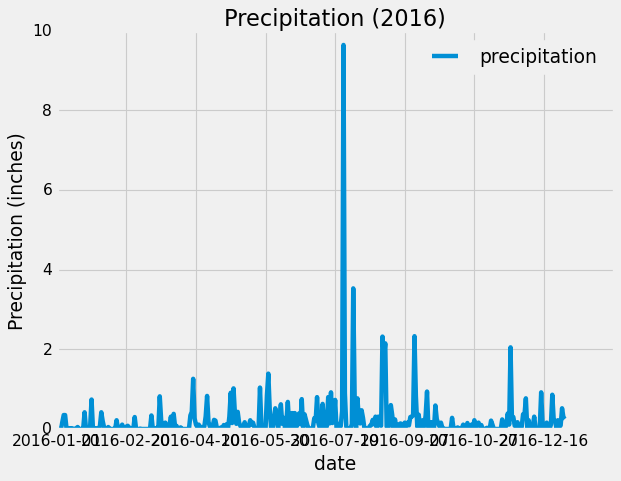

In [112]:
# 2. 2016 Precipitation

results_2016_daily_precip=[]

results_2016_daily_precip = session.query(Measurement.date, Measurement.prcp).filter(extract('year', Measurement.date) == 2016).filter(Measurement.station == 'USC00519281').all()
results_2016_daily_precip

df = pd.DataFrame(results_2016_daily_precip, columns=['date','precipitation'])
df.set_index(df['date'], inplace=True)

style.use('fivethirtyeight')

df.plot(x="date", y="precipitation")
plt.title("Precipitation (2016)")
plt.ylabel("Precipitation (inches)")

ax.xaxis.set_major_locator(mdates.MonthLocator())
# plt.show()

